In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [2]:
metaData = pd.read_csv("F:\MRI_class\oasis_cross_sectional.csv")
metaData = metaData[["ID","CDR"]]

f = lambda x: re.search('_(.+?)_', x)[1]
metaData.ID = metaData.ID.apply(f)
metaData = metaData[metaData.CDR.isna() == False]

y_train = metaData.CDR.iloc[0:10]


In [13]:
y_train.replace(0.5,1,inplace=True)

In [3]:
path = "F:\MRI_class\data\easy_test_set"
path_list = os.listdir(path)


In [4]:
'''checker = 0
for i in path_list:
    
    temp_path = path+"\\"+i
    image = tf.keras.preprocessing.image.load_img(temp_path)
    #input_arr = tf.keras.preprocessing.image.img_to_array(image)
    
    if checker == 0:
        temp_arr = tf.keras.preprocessing.image.img_to_array(image)
        temp_arr = temp_arr[:,:,:,np.newaxis]
        checker = 1

    if temp_arr.size != 0:
        input_arr = tf.keras.preprocessing.image.img_to_array(image)
        input_arr = input_arr[:,:,:,np.newaxis]
        temp_arr = np.concatenate((input_arr,temp_arr),axis = 3)
        print(temp_arr.shape)
    
temp_arr = np.moveaxis(temp_arr,3,0)'''
   

'checker = 0\nfor i in path_list:\n    \n    temp_path = path+"\\"+i\n    image = tf.keras.preprocessing.image.load_img(temp_path)\n    #input_arr = tf.keras.preprocessing.image.img_to_array(image)\n    \n    if checker == 0:\n        temp_arr = tf.keras.preprocessing.image.img_to_array(image)\n        temp_arr = temp_arr[:,:,:,np.newaxis]\n        checker = 1\n\n    if temp_arr.size != 0:\n        input_arr = tf.keras.preprocessing.image.img_to_array(image)\n        input_arr = input_arr[:,:,:,np.newaxis]\n        temp_arr = np.concatenate((input_arr,temp_arr),axis = 3)\n        print(temp_arr.shape)\n    \ntemp_arr = np.moveaxis(temp_arr,3,0)'

In [5]:

checker = 0
for t in range(0,len(path_list)):
    
    #iteration check
    if t+1 > len(path_list)-1:
        break

    #image1
    temp_path = path+"\\"+path_list[t]
    image1 = tf.keras.preprocessing.image.load_img(temp_path)
    input_arr1 = tf.keras.preprocessing.image.img_to_array(image1)
    input_arr1 = input_arr1[:,:,:,np.newaxis]
    
    #image2
    temp_path = path+"\\"+path_list[t+1]
    image2 = tf.keras.preprocessing.image.load_img(temp_path)
    input_arr2 = tf.keras.preprocessing.image.img_to_array(image2)
    input_arr2 = input_arr2[:,:,:,np.newaxis]

    #concatenate
    if t == 0:
        images = np.concatenate((input_arr1,input_arr2),axis = 3)
    
    if t > 0:
        images = np.concatenate((images,input_arr2),axis = 3)

    
images = np.moveaxis(images,3,0)


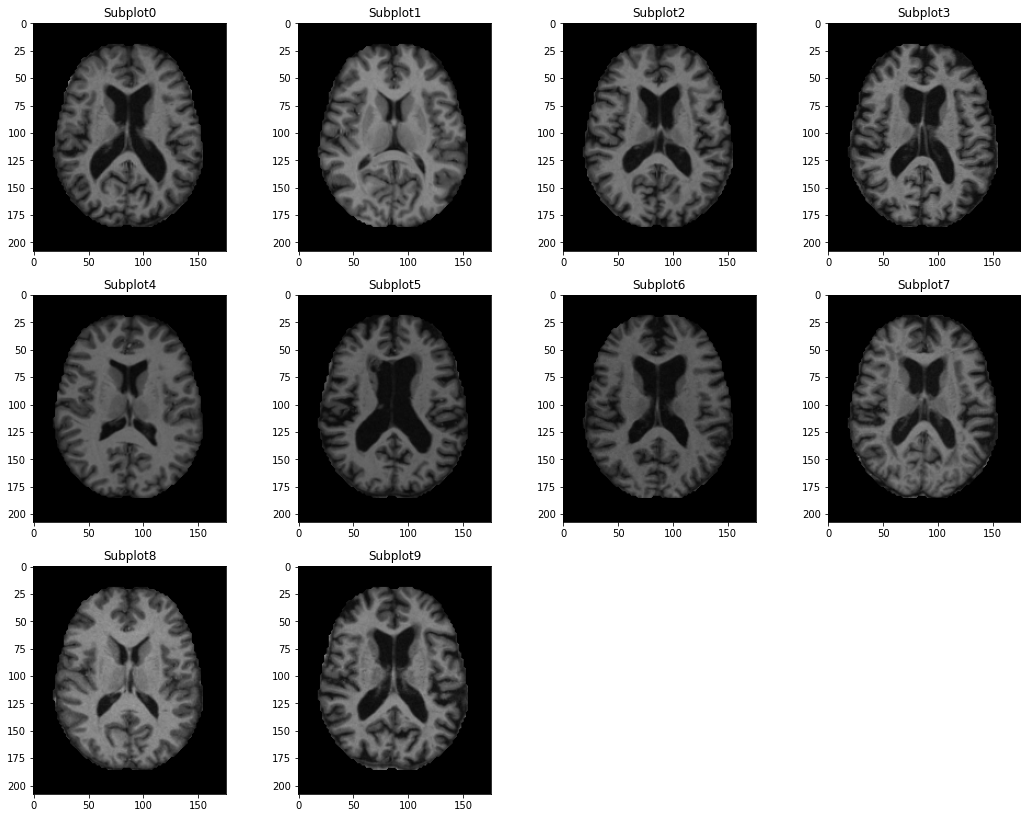

In [6]:
cols= 4
rows = 4
axes = []
width = 1000
height = 1000

fig = plt.figure(figsize=(15, 15))

for a in range(0,images.shape[0]):
    b = images[a][:][:][:].astype('uint8')
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Subplot"+str(a))
    axes[-1].set_title(subplot_title)  
    plt.imshow(b)
fig.tight_layout()
plt.show()

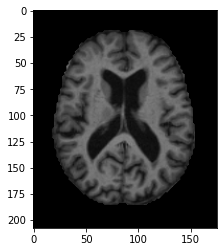

In [7]:
plt.imshow(images[0][:][:][:].astype('uint8'))

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(208, 176, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 206, 174, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 103, 87, 100)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 101, 85, 64)       57664     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 42, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 40, 64)        36928     
                                                                 
Total params: 97,392
Trainable params: 97,392
Non-traina

In [18]:

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))


In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(images, y_train, epochs=10, 
                    validation_data=(images, y_train))

Epoch 1/10
1/1 [==============================] - 1s 653ms/step - loss: 10.8239 - accuracy: 0.3000 - val_loss: 0.6464 - val_accuracy: 0.6000
Epoch 2/10
1/1 [==============================] - 0s 378ms/step - loss: 0.6464 - accuracy: 0.6000 - val_loss: 0.9618 - val_accuracy: 0.7000
Epoch 3/10
1/1 [==============================] - 0s 385ms/step - loss: 0.9618 - accuracy: 0.7000 - val_loss: 0.5632 - val_accuracy: 0.7000
Epoch 4/10
1/1 [==============================] - 0s 377ms/step - loss: 0.5632 - accuracy: 0.7000 - val_loss: 0.5313 - val_accuracy: 0.7000
Epoch 5/10
1/1 [==============================] - 0s 367ms/step - loss: 0.5313 - accuracy: 0.7000 - val_loss: 0.5400 - val_accuracy: 0.7000
Epoch 6/10
1/1 [==============================] - 0s 363ms/step - loss: 0.5400 - accuracy: 0.7000 - val_loss: 0.5120 - val_accuracy: 0.7000
Epoch 7/10
1/1 [==============================] - 0s 367ms/step - loss: 0.5120 - accuracy: 0.7000 - val_loss: 0.4480 - val_accuracy: 0.7000
Epoch 8/10
1/1 [===

1/1 - 0s - loss: 0.1278 - accuracy: 1.0000 - 96ms/epoch - 96ms/step


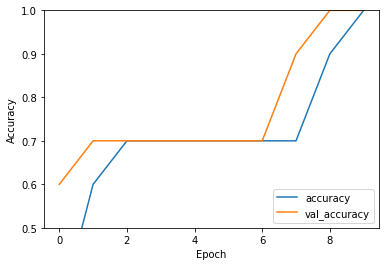

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(images,  y_train, verbose=2)

In [ ]:
temp_arr[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)